In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

In [2]:
data_train = pd.read_csv('train.csv')
data_train

,upload_date,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
0,20160205,789,778,12,0,False,False,False,False,False,Provided to YouTube by Hungaroton\n\nEltávozot...,Eltávozott nap
1,20121001,221,32,1,0,False,False,True,False,False,"y0 guys, one of my shots from my hitlists, but...",Hitlist Fail:/ #B2R
2,20210601,112,12,2,0,True,False,True,False,False,https://store.playstation.com/#!/tid=...,Call of Duty® warzone amp63
3,20210523,97,45,16,0,False,False,True,False,False,#حالات _واتساب _دينية,حالات واتساب اجمل صوت (سلمت قلبي ❤) تصميمي.
4,20201124,469,16,6,0,True,False,True,False,False,"Since I reviewed Fight Club earlier in 2020, I...",Fight Club (1999) Spoiler Review
...,...,...,...,...,...,...,...,...,...,...,...,...
671272,20180818,26,25,0,0,False,False,True,False,False,Filmed at Dead Horse Trauma's CD release show ...,Stone Park Ritual - The Break Live at Whiskey ...
671273,20180213,187,1,0,0,True,False,True,False,False,NaN,dialogo a las 7 05 febrero 2018 06 42 04 a m
671274,20170105,1290,118,0,0,True,False,True,False,False,"Credits:Text from Wikipedia,video auto-generat...",Τόνια Σωτηροπούλου - Σπουδές
671275,20210119,511,18,0,0,True,False,True,False,False,NaN,wonderful dressing in pregnancy


In [3]:
data_test = pd.read_csv('test.csv')
data_test

,upload_date,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
0,20190724,2860,2869,39,2,False,False,True,False,False,Subscribe for more Videos\n___________________...,Enna kavi Padinallum - Sid Sriram - கண்ணில் நீ...
1,20210306,1470,190,3,0,False,False,True,False,False,#Leksione #Kontabilitet #Shqip\n\nHapja e kët...,SITUACIONET DHE RREGJISTRIMI I KONTRATAVE TE...
2,20160820,2660,944,91,0,False,False,True,False,False,TWD: DARYL & CAROL (!THE END GAME!)\n=========...,TWD: DARYL & CAROL (!THE END GAME!)
3,20130409,55,4772,15,3,False,True,True,False,False,NaN,رياض حسن ايلاما ايلاما
4,20170122,148,130,6,1,False,False,True,False,True,CS:GO будь в курсе кто папа),Дневной спантанный стрим!!!
...,...,...,...,...,...,...,...,...,...,...,...,...
337092,20160207,524000,30583,643,42,True,True,True,False,False,✦✦ ¡Únete al EJÉRCITO REDSHOCKIANO!: https://g...,✤ Smash Bros. Wii U ✤ | EXTRA: TODAS las ESCEN...
337093,20120529,3560000,794,0,0,True,True,True,False,False,제목 : TV소설 사랑아 사랑아(17부)\r\n공식홈페이지 : http://www....,"TV소설 사랑아 사랑아 - TV Novel Love, My Love 20120529..."
337094,20170106,647,8,0,0,False,False,True,False,False,NaN,One and Only
337095,ntly offline,320,0,0,0,False,False,False,False,False,If I stop drawing its because I have Teen Tita...,Personal animation VENT


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671277 entries, 0 to 671276
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   upload_date          671277 non-null  object
 1   uploader_sub_count   671277 non-null  int64 
 2   view_count           671277 non-null  int64 
 3   like_count           671277 non-null  int64 
 4   dislike_count        671277 non-null  int64 
 5   has_subtitles        671277 non-null  bool  
 6   is_ads_enabled       671277 non-null  bool  
 7   is_comments_enabled  671277 non-null  bool  
 8   is_age_limit         671277 non-null  bool  
 9   is_live_content      671277 non-null  bool  
 10  description          503648 non-null  object
 11  title                671270 non-null  object
dtypes: bool(5), int64(4), object(3)
memory usage: 39.1+ MB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337097 entries, 0 to 337096
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   upload_date          337097 non-null  object
 1   uploader_sub_count   337097 non-null  int64 
 2   view_count           337097 non-null  int64 
 3   like_count           337097 non-null  int64 
 4   dislike_count        337097 non-null  int64 
 5   has_subtitles        337097 non-null  bool  
 6   is_ads_enabled       337097 non-null  bool  
 7   is_comments_enabled  337097 non-null  bool  
 8   is_age_limit         337097 non-null  bool  
 9   is_live_content      337097 non-null  bool  
 10  description          253438 non-null  object
 11  title                337091 non-null  object
dtypes: bool(5), int64(4), object(3)
memory usage: 19.6+ MB


In [6]:
data_train.isnull().sum()

upload_date                 0
uploader_sub_count          0
view_count                  0
like_count                  0
dislike_count               0
has_subtitles               0
is_ads_enabled              0
is_comments_enabled         0
is_age_limit                0
is_live_content             0
description            167629
title                       7
dtype: int64

In [7]:
data_test.isnull().sum()

upload_date                0
uploader_sub_count         0
view_count                 0
like_count                 0
dislike_count              0
has_subtitles              0
is_ads_enabled             0
is_comments_enabled        0
is_age_limit               0
is_live_content            0
description            83659
title                      6
dtype: int64

In [8]:
data_train.nunique() 

upload_date              5770
uploader_sub_count       4551
view_count              47453
like_count               8412
dislike_count            1926
has_subtitles               2
is_ads_enabled              2
is_comments_enabled         2
is_age_limit                2
is_live_content             2
description            487227
title                  665140
dtype: int64

In [9]:
data_train.duplicated().sum()

5

In [10]:
data_test.duplicated().sum()

5

In [11]:
num = ['uploader_sub_count', 'view_count', 'like_count', 'dislike_count']
data_train[num].describe()

,uploader_sub_count,view_count,like_count,dislike_count
count,6.712770e+05,6.712770e+05,6.712770e+05,671277.000000
mean,1.206806e+05,1.766095e+04,2.552738e+02,13.944394
std,1.759403e+06,7.603635e+05,6.094604e+03,566.305097
min,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000e+01,3.300000e+01,1.000000e+00,0.000000
50%,2.880000e+02,1.510000e+02,4.000000e+00,0.000000
75%,2.610000e+03,9.690000e+02,2.000000e+01,1.000000
max,1.990000e+08,3.801310e+08,1.604419e+06,213772.000000


In [12]:
data_test[num].describe()

,uploader_sub_count,view_count,like_count,dislike_count
count,3.370970e+05,3.370970e+05,3.370970e+05,337097.000000
mean,1.240847e+05,1.792302e+04,2.809559e+02,14.955316
std,1.869737e+06,6.023947e+05,1.210272e+04,633.380359
min,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000e+01,3.300000e+01,1.000000e+00,0.000000
50%,2.870000e+02,1.510000e+02,4.000000e+00,0.000000
75%,2.600000e+03,9.690000e+02,2.000000e+01,1.000000
max,1.990000e+08,2.293691e+08,6.158496e+06,275574.000000


In [13]:
other = ['has_subtitles', 'is_ads_enabled', 'is_comments_enabled', 'is_age_limit', 'is_live_content', 'upload_date']
data_train[other].describe()

,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,upload_date
count,671277,671277,671277,671277,671277,671277
unique,2,2,2,2,2,5770
top,False,False,True,False,False,20210819
freq,388292,589052,611408,668479,630170,542


We can see that there are not many videos that have ads enabeled or comments disabled or age limit or videos that have live contents . It can be seen that almost all values are False

## Outliers

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1724582721.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1724582721.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1724582721.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


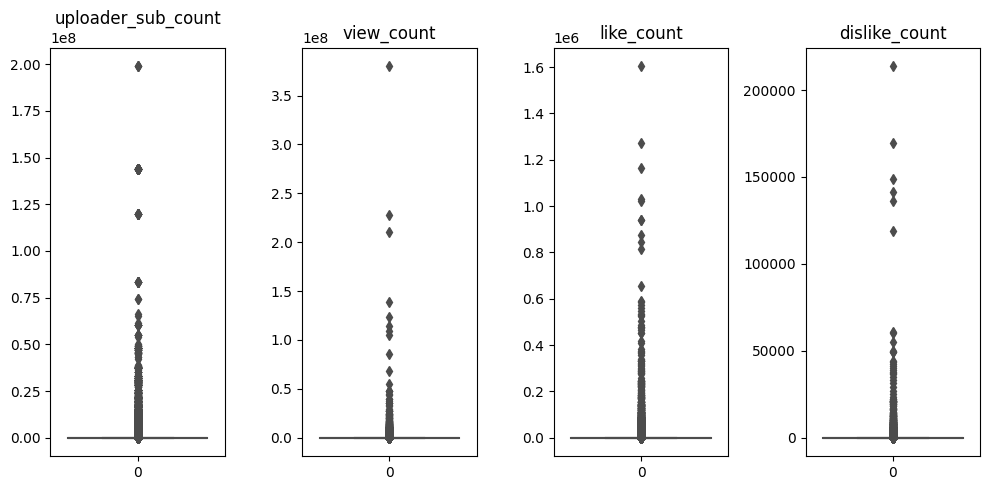

In [14]:
plt.figure(figsize=(10, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data_train[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Almost all of numerical features have extreme outliers.

## Data Distribution

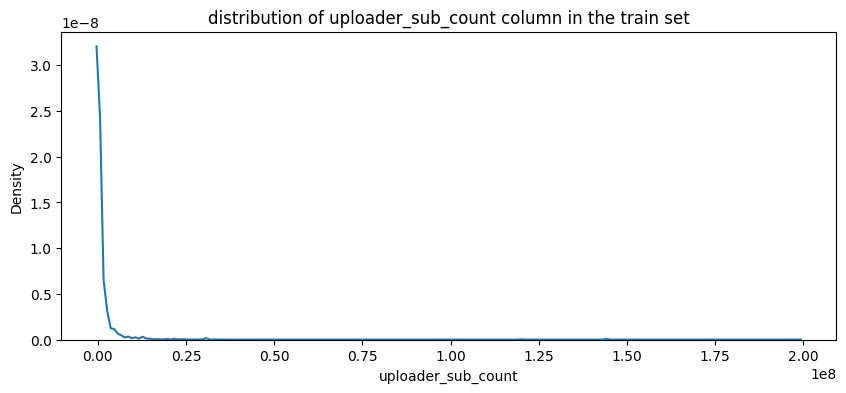

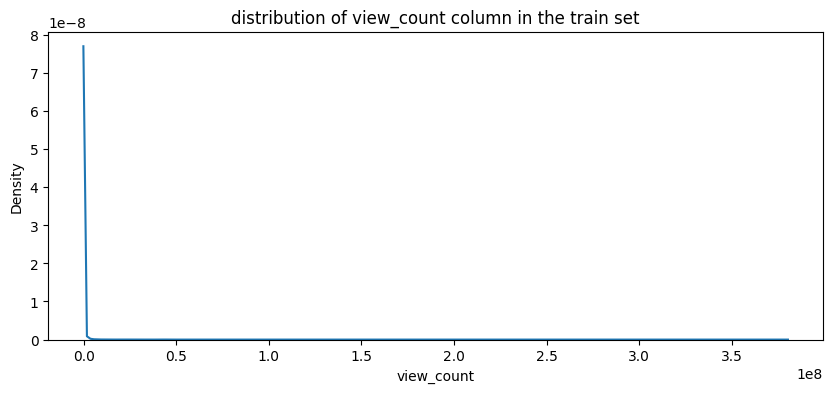

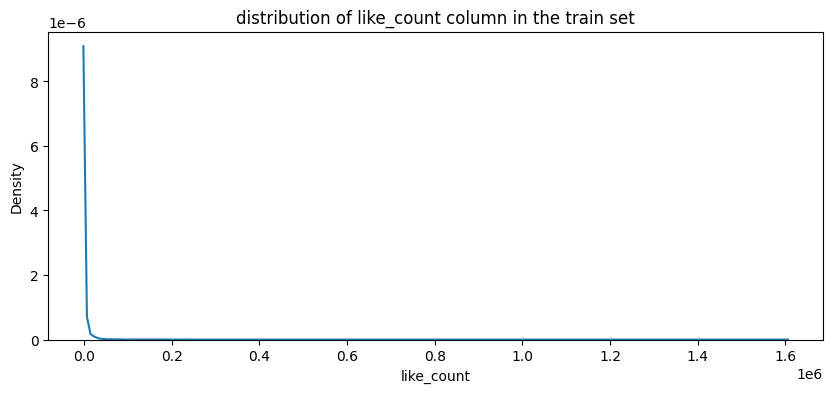

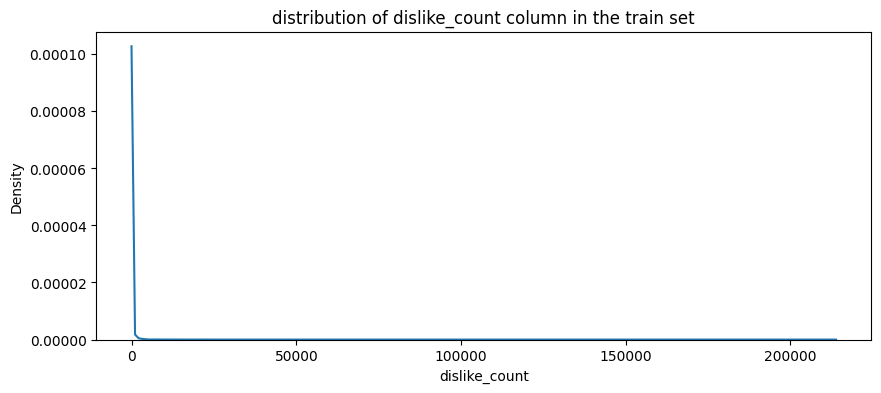

In [15]:
for col in data_train[num]:
    plt.figure(figsize=(10,4))
    sns.kdeplot(data = data_train[col])
    plt.title(f"distribution of {col} column in the train set")

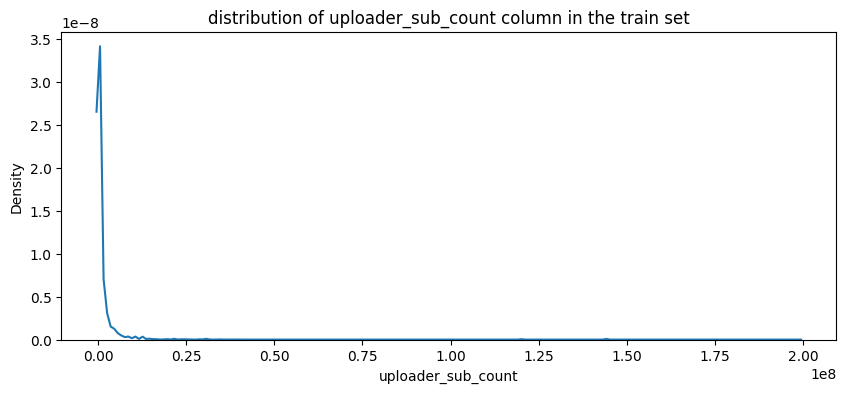

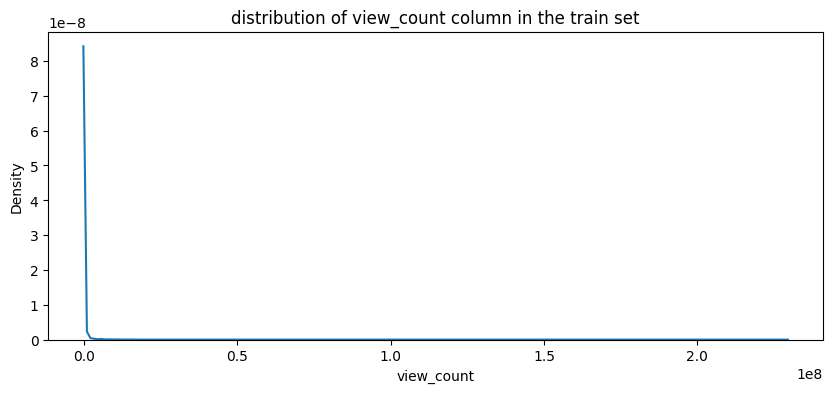

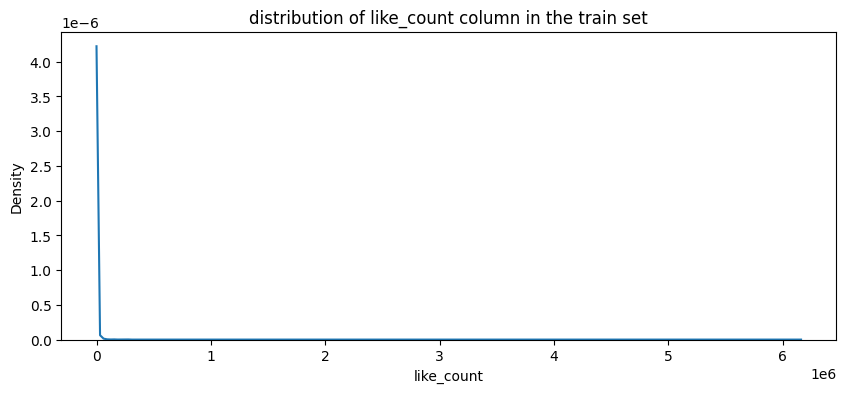

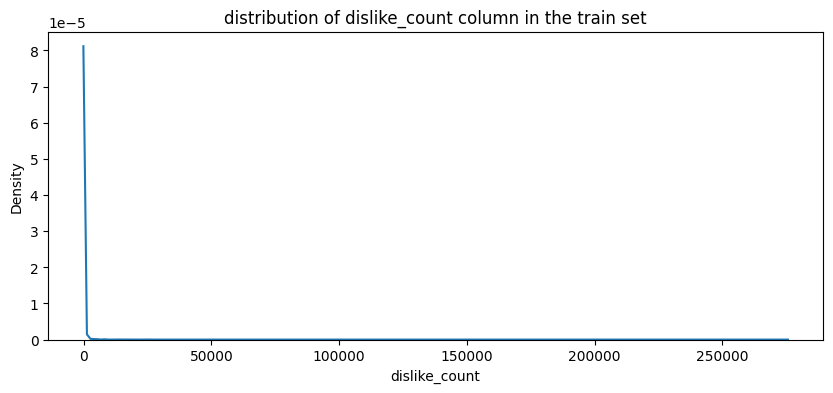

In [16]:
for col in data_test[num]:
    plt.figure(figsize=(10,4))
    sns.kdeplot(data = data_test[col])
    plt.title(f"distribution of {col} column in the train set")

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1592941425.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[num[i]], color='blue')
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1592941425.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[num[i]], color='blue')
C:\U

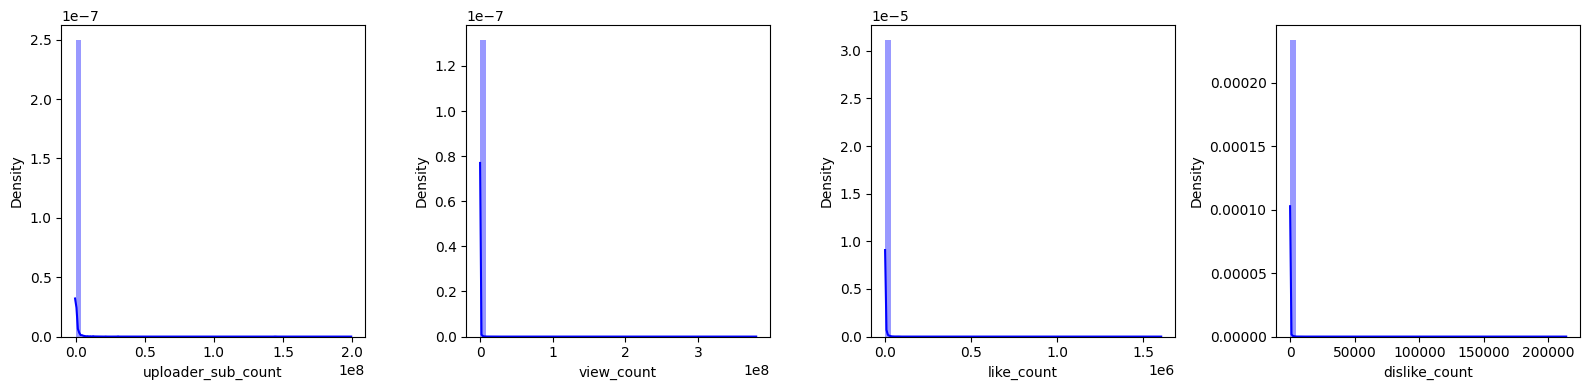

In [17]:
plt.figure(figsize=(16, 4))
for i in range(0, len(num)):
    plt.subplot(1, 4, i+1)
    sns.distplot(data_train[num[i]], color='blue')
    plt.tight_layout()

The graphs of numerical features show non-Gaussian distribution of data as seen from the very spiky graph

In [18]:
from scipy.stats import kurtosis
print(f"Kurtosis Co-efficient uploader_sub_count: {round(data_train.uploader_sub_count.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Views : {round(data_train.view_count.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Likes: {round(data_train.like_count.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Dislikes: {round(data_train.dislike_count.kurtosis(), 3)}")

Kurtosis Co-efficient uploader_sub_count: 4314.965
Kurtosis Co-efficient Views : 119004.193
Kurtosis Co-efficient Likes: 19648.128
Kurtosis Co-efficient Dislikes: 64304.666


## Correlation Heatmap

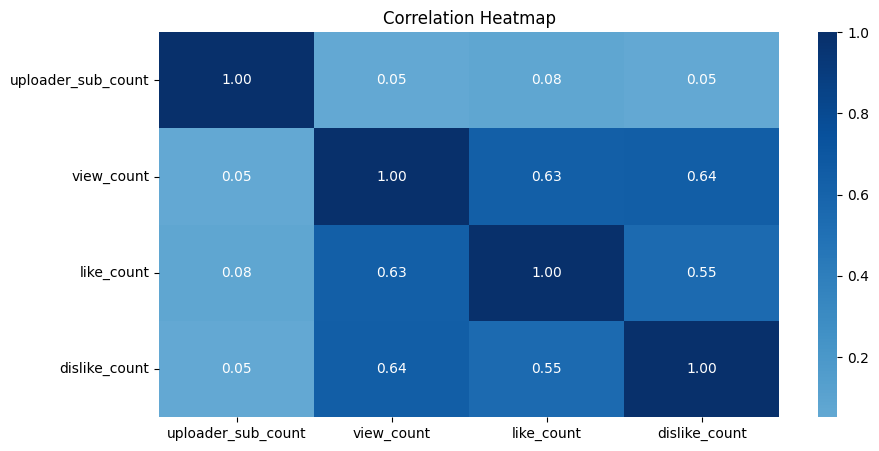

In [19]:
# Heatmap correlation
corr_matrix = data_train[num].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

uploader_sub_count can be removed.

## Feature and Target Correlation

C:\Users\parla\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x800 with 0 Axes>

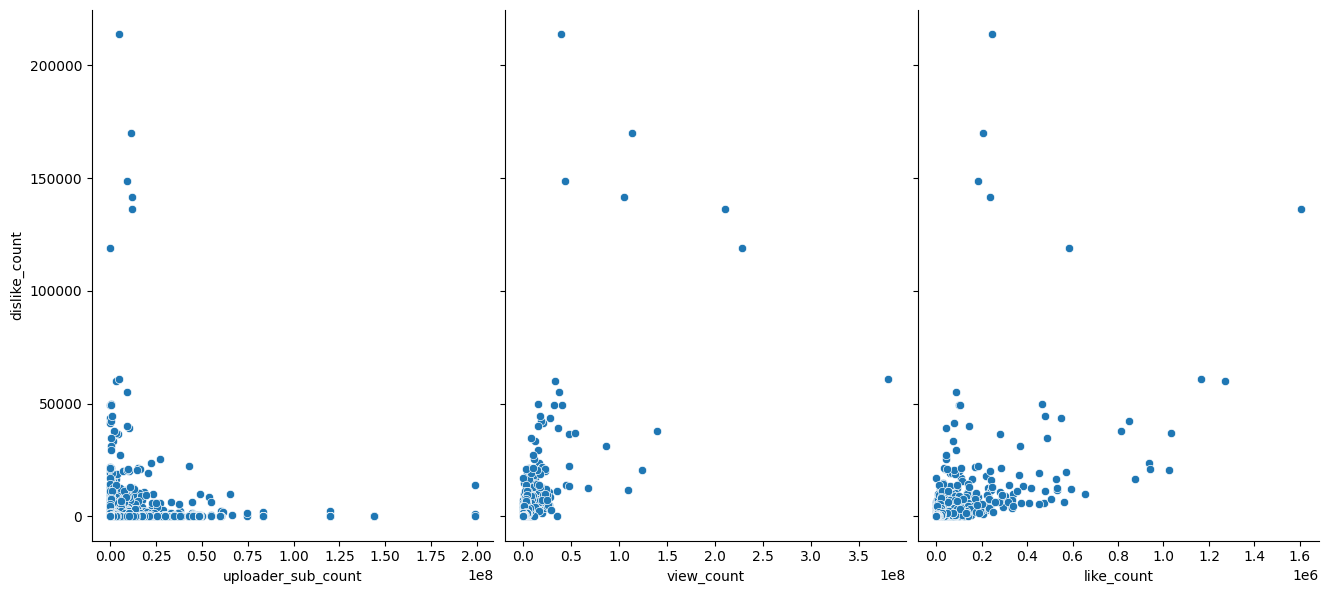

In [20]:
# Pairplot to see the correlation with the target: views
plt.figure(figsize=(24,8))
fig = sns.pairplot(data=data_train, x_vars=['uploader_sub_count', 'view_count', 'like_count'], y_vars=['dislike_count'], height=6, aspect=0.75);
fig.tight_layout();

## Data Cleaning

In [21]:
# Delete duplicated rows
data_train = data_train.drop_duplicates(keep='first')

print(f'duplicated train rows: {data_train.duplicated().sum()}')

duplicated train rows: 0


In [22]:
data_test = data_test.drop_duplicates(keep='first')

print(f'duplicated test rows: {data_test.duplicated().sum()}')

duplicated test rows: 0


In [23]:
data_train.shape, data_test.shape

((671272, 12), (337092, 12))

## Irrelevant Features

Some features seem less relevant and their unique value is too broad, as we have analyzed previously. So it is assumed that these features do not have a particular pattern.

In [24]:
data_train.dtypes

upload_date            object
uploader_sub_count      int64
view_count              int64
like_count              int64
dislike_count           int64
has_subtitles            bool
is_ads_enabled           bool
is_comments_enabled      bool
is_age_limit             bool
is_live_content          bool
description            object
title                  object
dtype: object

In [25]:
data_train['description'] = data_train['description'].fillna('')
data_train['title'] = data_train['title'].fillna('')

data_test['description'] = data_test['description'].fillna('')
data_test['title'] = data_test['title'].fillna('')

# Compute the length of description
data_train['desc_len']=data_train['description'].astype('str').apply(len)
# Compute the length of title
data_train['len_title']=data_train['title'].astype('str').apply(len)

# Compute the length of description
data_test['desc_len']=data_test['description'].astype('str').apply(len)
# Compute the length of title
data_test['len_title']=data_test['title'].astype('str').apply(len)

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\4013884787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['description'] = data_train['description'].fillna('')
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\4013884787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['title'] = data_train['title'].fillna('')
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\4013884787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [26]:
data_train = data_train.drop(columns=['description', 'title','uploader_sub_count'])
data_test = data_test.drop(columns=['description', 'title', 'uploader_sub_count'])

In [27]:
bool_cols = ['has_subtitles' ,'is_ads_enabled' , 'is_comments_enabled' ,'is_age_limit' ,'is_live_content']
for col in bool_cols:
    data_train[col] = data_train[col].map({True: 1,False :0 })
    data_test[col] = data_test[col].map({True: 1,False :0 })


In [28]:
data_train

,upload_date,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,desc_len,len_title
0,20160205,778,12,0,0,0,0,0,0,166,14
1,20121001,32,1,0,0,0,1,0,0,203,19
2,20210601,12,2,0,1,0,1,0,0,40,27
3,20210523,45,16,0,0,0,1,0,0,21,44
4,20201124,16,6,0,1,0,1,0,0,1149,32
...,...,...,...,...,...,...,...,...,...,...,...
671272,20180818,25,0,0,0,0,1,0,0,100,52
671273,20180213,1,0,0,1,0,1,0,0,0,47
671274,20170105,118,0,0,1,0,1,0,0,64,28
671275,20210119,18,0,0,1,0,1,0,0,0,31


In [29]:
data_train.dtypes

upload_date            object
view_count              int64
like_count              int64
dislike_count           int64
has_subtitles           int64
is_ads_enabled          int64
is_comments_enabled     int64
is_age_limit            int64
is_live_content         int64
desc_len                int64
len_title               int64
dtype: object

In [30]:
data_train['upload_date']  = pd.to_datetime( data_train['upload_date'] , format='%Y%m%d', errors='coerce')
data_test['upload_date']  = pd.to_datetime( data_test['upload_date'] , format='%Y%m%d', errors='coerce')

In [31]:
data_train['upload_date'].isnull().sum(), data_test['upload_date'].isnull().sum()

(54, 17)

In [32]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [33]:
# Convert to Unix timestamp
data_train['upload_date'] = data_train['upload_date'].apply(lambda x: int(x.timestamp()))
data_test['upload_date'] = data_test['upload_date'].apply(lambda x: int(x.timestamp()))


C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1365764633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['upload_date'] = data_train['upload_date'].apply(lambda x: int(x.timestamp()))


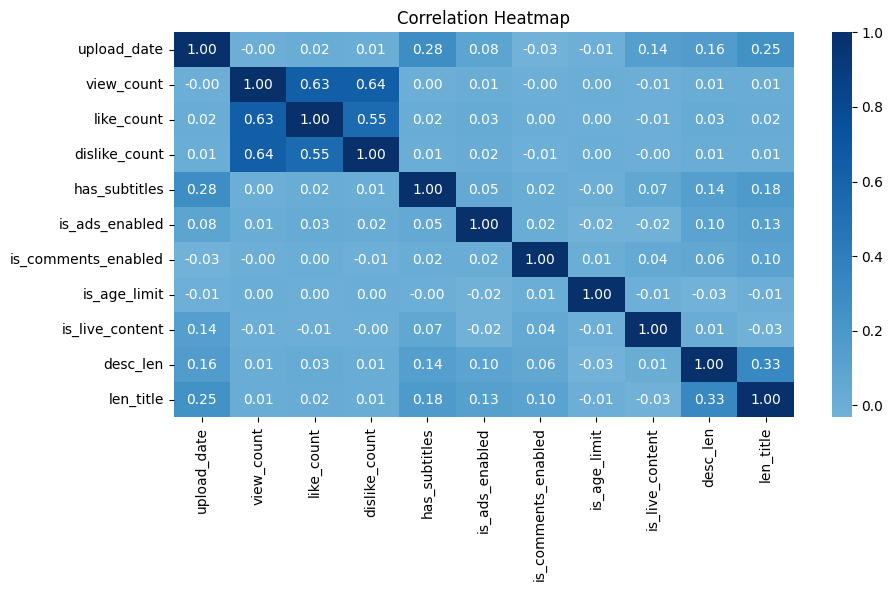

In [34]:
corr_matrix = data_train.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables,
<br> PCA does not work well to reduce data. Refer to the correlation matrix to determine.
<br> In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.

we can use power transform to normalize data

In [35]:
data_train = data_train.drop(columns=['is_age_limit'])
data_test = data_test.drop(columns=['is_age_limit'])

## Handling Outliers

In [36]:
df_cleansing_train = data_train.copy()
df_cleansing_test = data_test.copy()

In [37]:
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    column_name = df.columns[column]
    total_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    percent_outliers = round(((total_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Total outliers in ', column_name, ' :', total_outliers, ' and outliers percentage:', percent_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('Check the input')

In [38]:
column = [1, 2, 3]

for i in range(0, len(column)):
    outlier_del(df_cleansing_train, column[i], 'summary')

Total outliers in  view_count  : 109725  and outliers percentage: 16.35 %
Total outliers in  like_count  : 101921  and outliers percentage: 15.18 %
Total outliers in  dislike_count  : 105667  and outliers percentage: 15.74 %


In [39]:
# Delete outliers of columns contain outliers below 5%
df_cleansing_train = df_cleansing_train[df_cleansing_train.index.isin(outlier_del(data_train, 1, 'df').reset_index()['index'])]
df_cleansing_train = df_cleansing_train[df_cleansing_train.index.isin(outlier_del(data_train, 2, 'df').reset_index()['index'])]
#df_cleansing_train = df_cleansing_train[df_cleansing_train.index.isin(outlier_del(data_train, 3, 'df').reset_index()['index'])]
#df_cleansing_train = df_cleansing_train[df_cleansing_train.index.isin(outlier_del(data_train, 4, 'df').reset_index()['index'])]
df_cleansing_train.shape

(536254, 10)

In [40]:
column = [1, 2, 3]

for i in range(0, len(column)):
    outlier_del(df_cleansing_test, column[i], 'summary')

Total outliers in  view_count  : 54911  and outliers percentage: 16.29 %
Total outliers in  like_count  : 51147  and outliers percentage: 15.17 %
Total outliers in  dislike_count  : 53521  and outliers percentage: 15.88 %


In [41]:
# Delete outliers of columns contain outliers below 5%
df_cleansing_test = df_cleansing_test[df_cleansing_test.index.isin(outlier_del(data_test, 1, 'df').reset_index()['index'])]
df_cleansing_test = df_cleansing_test[df_cleansing_test.index.isin(outlier_del(data_test, 2, 'df').reset_index()['index'])]
#df_cleansing_test = df_cleansing_test[df_cleansing_test.index.isin(outlier_del(data_test, 3, 'df').reset_index()['index'])]
# df_cleansing_test = df_cleansing_test[df_cleansing_test.index.isin(outlier_del(data_test, 4, 'df').reset_index()['index'])]
df_cleansing_test.shape

(269460, 10)

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\2872078660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train.like_count)
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\2872078660.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleansing_train.like_count)


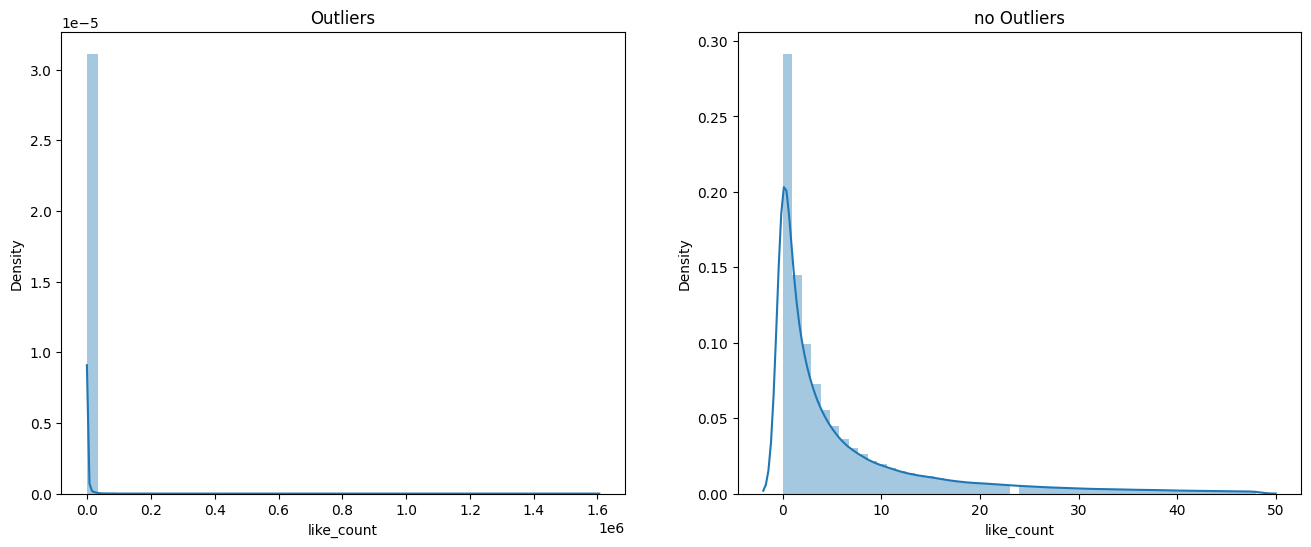

In [42]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(data_train.like_count)
plt.title('Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_cleansing_train.like_count)
plt.title('no Outliers')
plt.show()

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\4093904415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train.view_count)
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\4093904415.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleansing_train.view_count)


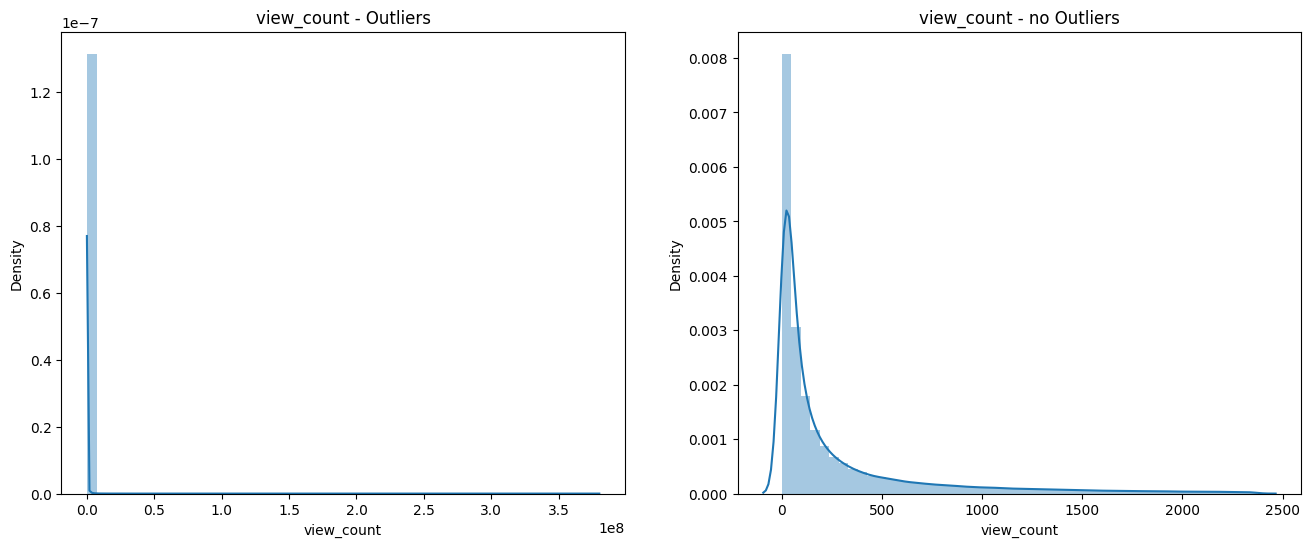

In [43]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(data_train.view_count)
plt.title('view_count - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_cleansing_train.view_count)
plt.title('view_count - no Outliers')
plt.show()

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1208487418.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test.like_count )
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\1208487418.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleansing_test.like_count )


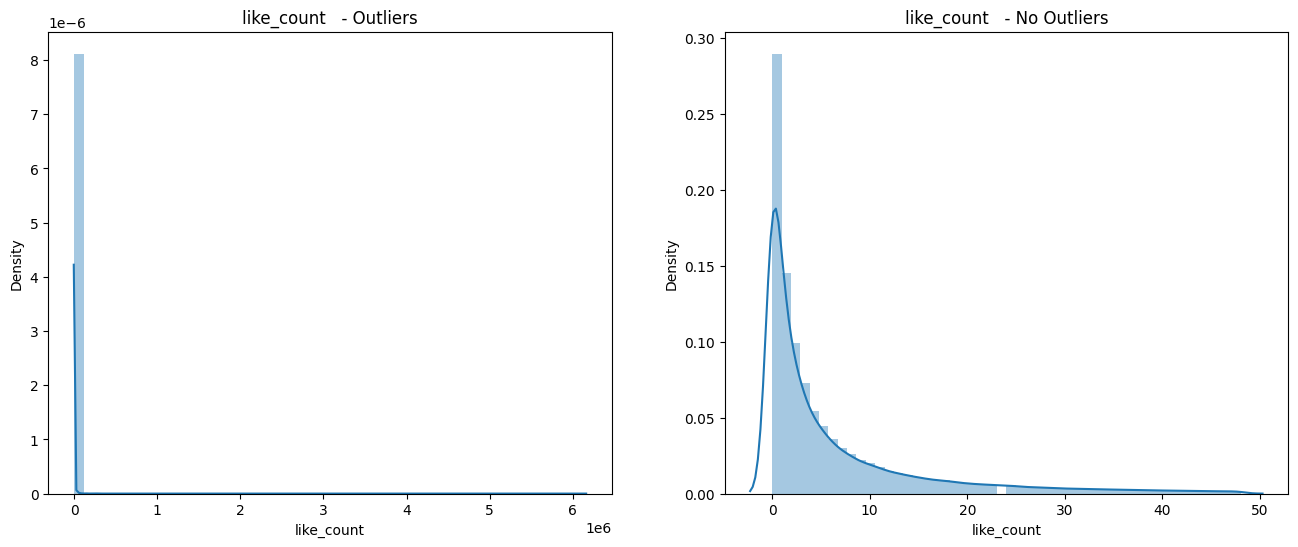

In [44]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(data_test.like_count )
plt.title('like_count   - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_cleansing_test.like_count )
plt.title('like_count   - No Outliers')
plt.show()

C:\Users\parla\AppData\Local\Temp\ipykernel_6608\329098557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test.view_count )
C:\Users\parla\AppData\Local\Temp\ipykernel_6608\329098557.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleansing_test.view_count )


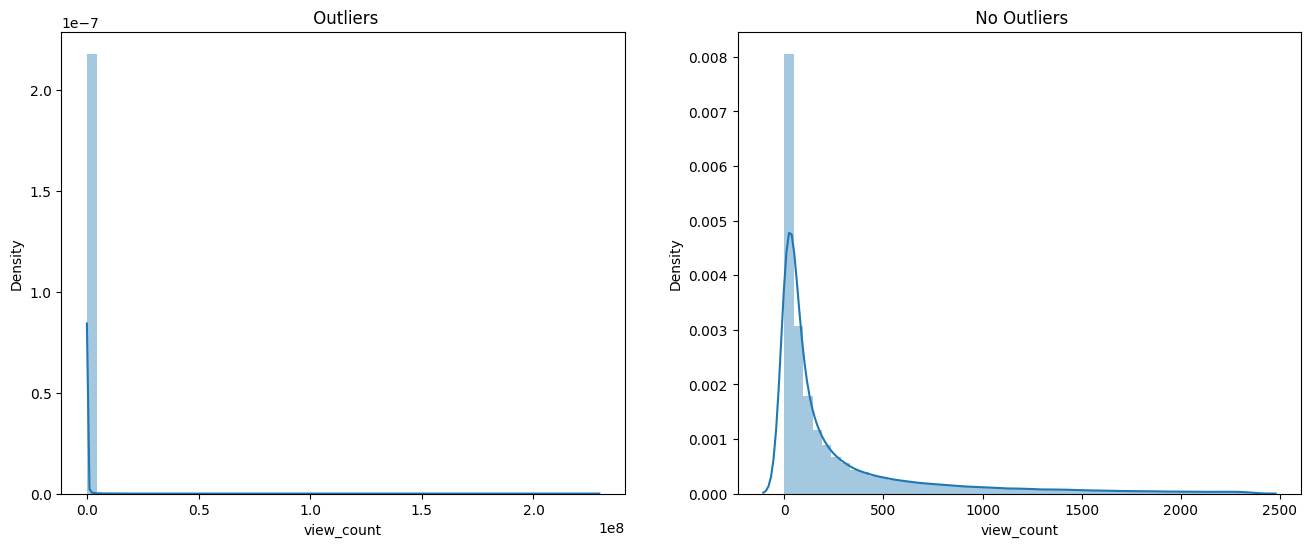

In [45]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(data_test.view_count )
plt.title(' Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_cleansing_test.view_count )
plt.title(' No Outliers')
plt.show()

when i remove dislike count outliers,nothing remaining!

In [46]:
df_cleansing_train

,upload_date,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_live_content,desc_len,len_title
0,1454630400,778,12,0,0,0,0,0,166,14
1,1349049600,32,1,0,0,0,1,0,203,19
2,1622505600,12,2,0,1,0,1,0,40,27
3,1621728000,45,16,0,0,0,1,0,21,44
4,1606176000,16,6,0,1,0,1,0,1149,32
...,...,...,...,...,...,...,...,...,...,...
671272,1534550400,25,0,0,0,0,1,0,100,52
671273,1518480000,1,0,0,1,0,1,0,0,47
671274,1483574400,118,0,0,1,0,1,0,64,28
671275,1611014400,18,0,0,1,0,1,0,0,31


In [47]:
#outliers are a major concern
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
std_train = scaler.fit_transform( df_cleansing_train).astype(np.float32)
std_test = scaler.transform( df_cleansing_test).astype(np.float32)


std_train = pd.DataFrame(std_train, columns= df_cleansing_train.columns)
std_test = pd.DataFrame(std_test, columns= df_cleansing_test.columns)



In [48]:
# std_train.to_csv('std_train.csv')
# std_test.to_csv('std_test.csv')

In [49]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


it made a problem!memory problem because of the float64 ! which one scaler ! we must change float 64 to 32

In [50]:
X_train = std_train.drop(columns=['dislike_count'])
y_train= std_train['dislike_count']
X_test = std_test.drop(columns=['dislike_count'])
y_test= std_test['dislike_count']

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((536254, 9), (536254,), (269460, 9), (269460,))

In [52]:
y_preds =[]
regressors = []

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred_linear = lr.predict(X_test)
y_preds.append(y_pred_linear)
regressors.append('linear')
y_preds

[array([0.24424921, 0.35426784, 1.3007238 , ..., 2.3053138 , 0.5879744 ,
        0.01915775], dtype=float32)]

In [56]:
y1 =y_test.max()
y2 = y_pred_linear.max()
ymax = y1 if y1>y2 else y2
ymax

160.0

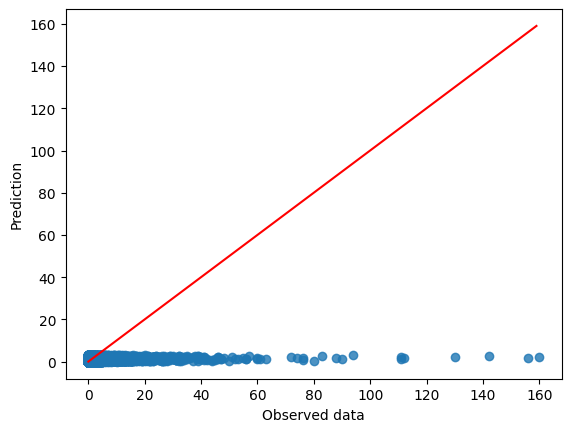

In [57]:
y_test.max
x = np.arange(0.01,ymax)
plt.plot(x, x, c='red')
plt.scatter(x=y_test,y= y_pred_linear, alpha =0.8)
plt.xlabel('Observed data')
plt.ylabel('Prediction');

i was not able to run the quantile regression,it might be not efficient,no much memory usage but it takes too much timeeee?!,
i am going to proceed with other regressions ...

polynomial has memory error, i want to use a dimention reduction. 

In [58]:
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.manifold import TSNE

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
pf = PolynomialFeatures(degree=3)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [61]:
lr2 = LinearRegression(fit_intercept=False)
y_pred_polynomial = lr2.fit(X_train_pf, y_train).predict(X_test_pf)
y_preds.append(y_pred_polynomial)
regressors.append('polynomial')

Text(0, 0.5, 'Prediction')

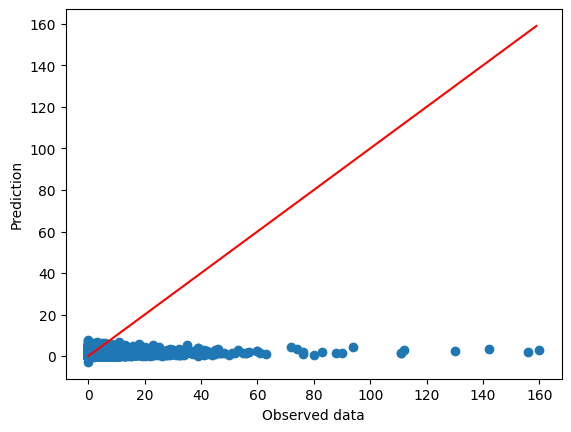

In [62]:
y1 =y_test.max()
y2 = y_pred_polynomial.max()
ymax = y1 if y1>y2 else y2
x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=y_pred_polynomial)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

because of memory error ,polynomial fine tune must be after pca dimention reduction, or i can remove the columns i have created.


Text(0, 0.5, 'Prediction')

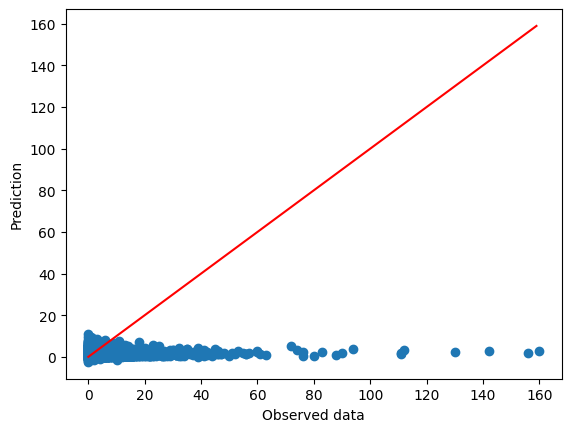

In [63]:
pf = PolynomialFeatures(degree=4, interaction_only=True)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)


lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train_pf, y_train)
y_pred_polynomial4 = lr2.predict(X_test_pf)
y_preds.append(y_pred_polynomial4)
regressors.append('polynomial4')



y1 =y_test.max()
y2 = y_pred_polynomial4.max()
ymax = y1 if y1>y2 else y2
x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=y_pred_polynomial4)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [64]:
#fine tuning polynomial degree hyperparameter
from sklearn.model_selection import cross_val_score

best_degree = 0
best_score = -np.inf

for degree in range(1,4):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_degree = degree
        best_score = mean_score

print(f"Best degree: {best_degree}, Best score: {best_score}")

Best degree: 3, Best score: -2.539725399017334


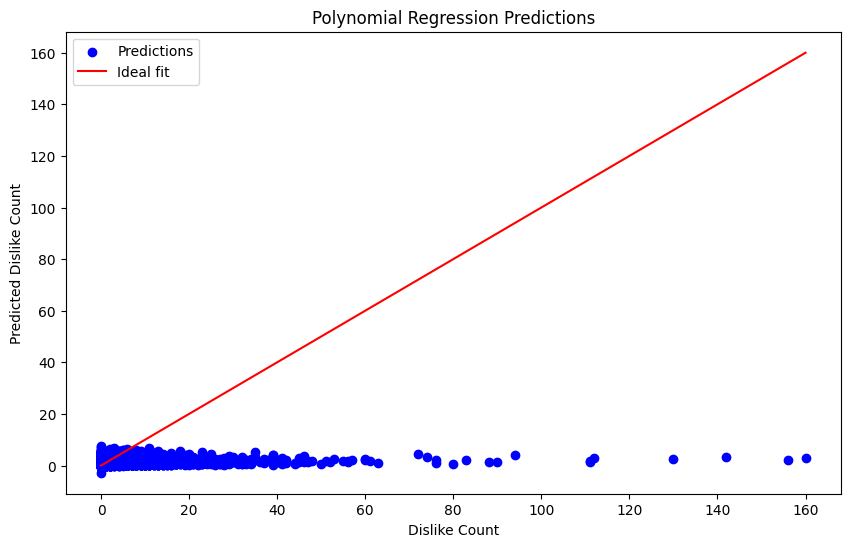

In [65]:
# Train the final model with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_polynomial_best = model.predict(X_test_poly)
y_preds.append(y_pred_polynomial_best)
regressors.append('polynomial_best')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_polynomial_best, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal fit')
plt.xlabel('Dislike Count')
plt.ylabel('Predicted Dislike Count')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.show()

In [66]:
from sklearn.linear_model import Ridge

In [67]:
lr3 = Ridge(alpha=10)
lr3.fit(X_train, y_train)

Ridge(alpha=10)

In [68]:
y_pred_ridge = lr3.predict(X_test)
y_preds.append(y_pred_ridge)
regressors.append('ridge')

y1 =y_test.max()
y2 = y_pred_ridge.max()
ymax = y1 if y1>y2 else y2

Text(0, 0.5, 'Prediction')

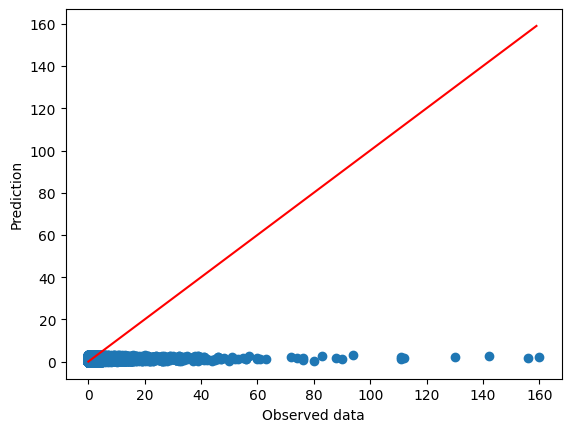

In [69]:
x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=lr3.predict(X_test))
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [70]:
# we can fine-tune the alpha hyperparameter of ridge
# with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV

alpha_values = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,
                         20,30,35,40,45,50,55,100]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best value for alpha : ",grid_search.best_params_)
print("Best score : ", grid_search.best_score_)
y_pred_ridge_best = grid_search.predict(X_test)
y_preds.append(y_pred_ridge_best)
regressors.append('ridge_best')

Best value for alpha :  {'alpha': 100}
Best score :  -2.5771149158477784


In [71]:
from sklearn.linear_model import Lasso

In [72]:
lr4 = Lasso(alpha=10)
lr4.fit(X_train, y_train)

Lasso(alpha=10)

In [73]:
y_pred_lasso = lr4.predict(X_test)
y_preds.append(y_pred_lasso)
regressors.append('lasso')

y1 =y_test.max()
y2 = y_pred_lasso.max()
ymax = y1 if y1>y2 else y2

Text(0, 0.5, 'Prediction')

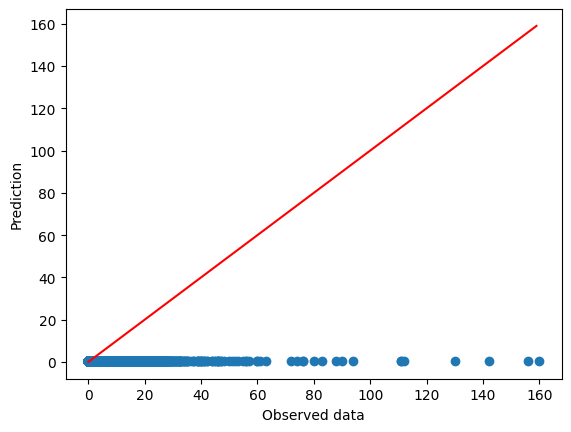

In [74]:

x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=y_pred_lasso)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [75]:
# fine-tune for lasso

LassoRegression = Lasso()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(X_train,y_train)

print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score : ", LassoRegressor.best_score_)

y_pred_lasso_best = LassoRegressor.predict(X_test)
y_preds.append(y_pred_lasso_best)
regressors.append('lasso_best')

C:\Users\parla\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.589e+05, tolerance: 1.222e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\parla\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.497e+05, tolerance: 1.204e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\parla\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.623e+05, toler

Best value for alpha :  {'alpha': 1e-15}
Best score :  -2.577115058898926


C:\Users\parla\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.909e+05, tolerance: 1.512e+02
  model = cd_fast.enet_coordinate_descent(


In [76]:
from sklearn.linear_model import ElasticNet

Text(0, 0.5, 'Prediction')

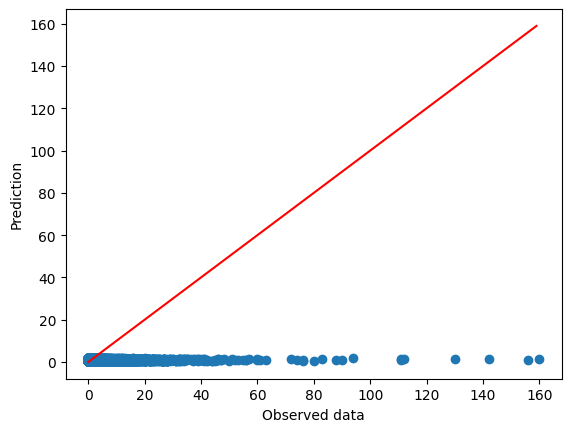

In [77]:
lr5 = ElasticNet(alpha=1, l1_ratio=0.2)
lr5.fit(X_train, y_train)
y_pred_eNet = lr5.predict(X_test)
y_preds.append(y_pred_eNet)
regressors.append('eNet')

y1 =y_test.max()
y2 = y_pred_eNet.max()
ymax = y1 if y1>y2 else y2

x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y= y_pred_eNet)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [78]:
#pip install notebook
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [79]:
%%skip
parametersGrid = {"max_iter": [1, 5, 10],
                  "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNetRegression = ElasticNet()
eNetRegressor = GridSearchCV(eNetRegression, parametersGrid, scoring='r2', cv=5)
eNetRegressor.fit(X_train, y_train)

print("Best value for alpha : ",eNetRegressor.best_params_)
print("Best score : ", eNetRegressor.best_score_)

y_pred_eNet_best = eNetRegressor.predict(X_test)
y_preds.append(y_pred_eNet_best)
regressors.append('eNet_best')

In [80]:
from sklearn.metrics import max_error,mean_absolute_error, mean_squared_error 
from sklearn.metrics import r2_score

In [81]:

def eval_ergression(y_pred,y_test): 
    print("MAE: " , mean_absolute_error(y_test, y_pred))
    print("RMSE: " , mean_squared_error(y_test, y_pred, squared=False))
    print('R2 score: ', r2_score(y_test, y_pred))

    

In [82]:
regressors

['linear',
 'polynomial',
 'polynomial4',
 'polynomial_best',
 'ridge',
 'ridge_best',
 'lasso',
 'lasso_best',
 'eNet']

In [83]:
for i,prediction in enumerate(y_preds):
    print(f"{regressors[i]}regressor :")
    eval_ergression(prediction,y_test)

linearregressor :
MAE:  0.5447342
RMSE:  1.5921983
R2 score:  0.08924706002554161
polynomialregressor :
MAE:  0.5358645
RMSE:  1.5803518
R2 score:  0.10274907528030741
polynomial4regressor :
MAE:  0.5398357
RMSE:  1.5832808
R2 score:  0.09942031775117999
polynomial_bestregressor :
MAE:  0.53570914
RMSE:  1.5803498
R2 score:  0.10275144532768965
ridgeregressor :
MAE:  0.54473454
RMSE:  1.5921981
R2 score:  0.08924712155181458
ridge_bestregressor :
MAE:  0.54473627
RMSE:  1.5921977
R2 score:  0.08924768775420977
lassoregressor :
MAE:  0.66738063
RMSE:  1.6683935
R2 score:  -7.597696219274752e-06
lasso_bestregressor :
MAE:  0.5447342
RMSE:  1.5921983
R2 score:  0.08924706334972377
eNetregressor :
MAE:  0.5944414
RMSE:  1.6129527
R2 score:  0.0653487642094791


In [84]:
def compute_metrics(X_test, y_pred, y_test):
    metrics = {
        'max_error': max_error(y_test,  y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2 score': r2_score(y_test, y_pred),
       
        #'Result ' : model.score(X_test, y_test)
    }
    return metrics

In [85]:
metrics_dict = {name: {} for name in regressors}

for name, y_pred in zip(regressors, y_preds):
    metrics = compute_metrics(X_test, y_pred, y_test)
    metrics_dict[name] = metrics

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

                  max_error       MAE      RMSE  R2 score
linear           157.734802  0.544734  1.592198  0.089247
polynomial       156.993942  0.535864  1.580352  0.102749
polynomial4      157.194458  0.539836  1.583281  0.099420
polynomial_best  156.996429  0.535709  1.580350  0.102751
ridge            157.734818  0.544735  1.592198  0.089247
ridge_best       157.734940  0.544736  1.592198  0.089248
lasso            159.586716  0.667381  1.668393 -0.000008
lasso_best       157.734802  0.544734  1.592198  0.089247
eNet             158.641647  0.594441  1.612953  0.065349


In [86]:
## Quantile Regression

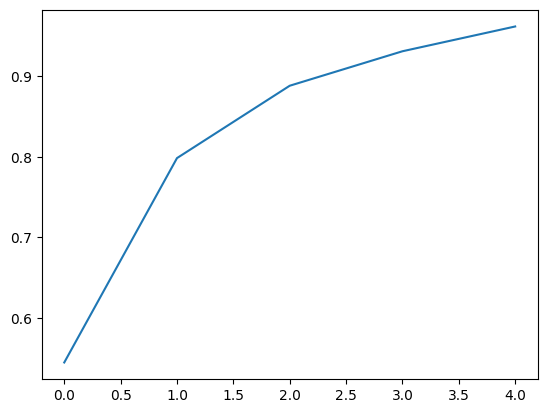

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X2 = pca.fit_transform(X_train)
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained_variance_ratio against the number of components
pc_vs_variance
plt.plot(pc_vs_variance)

In [88]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

In [89]:
%%skip
from sklearn.linear_model import QuantileRegressor

In [90]:
%%skip
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_test, dtype=bool)

In [91]:
%%skip
from sklearn.utils.fixes import parse_version, sp_version
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [92]:
%%skip
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X_train_pca, y_train).predict(X_test_pca)
    y_preds.append(y_pred)
    regressors.append('quantile')
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred >= y_test)
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y_test)


In [93]:
%%skip
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.mean() * np.ones_like(y_test), color="black", linestyle="dashed", label="True mean")

In [94]:
%%skip
for quantile, y_pred in predictions.items():
    plt.plot(y_test.index, y_pred, label=f"Quantile: {quantile}")

In [95]:
%%skip
plt.scatter(
    y_test.index[out_bounds_predictions],
    y_test[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)

In [96]:
%%skip
plt.scatter(
    y_test.index[~out_bounds_predictions],
    y_test[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("Index")
plt.ylabel("Dislike Count")
plt.title("Quantiles of Dislike Count Prediction")
plt.show()

quantile didnt work even after dimention reduction, i dont know why!

## Decision Tree Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [98]:
y_pred_dt = dt_regressor.predict(X_test)

y_preds.append(y_pred_dt)
regressors.append('dt')
y_pred_dt

array([ 2.,  1.,  0., ..., 30.,  1.,  0.])

decision tree's output is integer numbers

## Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [100]:
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)


In [101]:
y_pred_rf = y_test_pred
y_preds.append(y_pred_rf)
regressors.append('rf')

In [102]:
%%skip
#it takes too much!
param_grid = { 
    'n_estimators'     : [20,30,40],
    'max_depth'        : [8,12,16]
}

rf_regressor1 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,cv=3)
rf_regressor1.fit(X_train_pca, y_train)

print("Best value for alpha : ",rf_regressor1.best_params_)
print("Best score : ", rf_regressor1.best_score_)




i used here reduced dimention for train and test data

In [103]:
%%skip
# put best scores...
rfr = RandomForestRegressor(max_depth=rf_regressor1.best_params_['max_depth'],
                            n_estimators=rf_regressor1.best_params_['n_estimators'])
rfr.fit(X_train,y_train)
pca = PCA(n_components=5)
pca.fit(X_test)
x_test = pca.transform(X_test)

y_pred_rf_best=rfr.predict(x_test)
y_preds.append(y_pred_rf_best)
regressors.append('rf_best')

In [104]:
%%skip
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [105]:
%%skip
model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(X_train, y_train)


# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
labels = {'True Labels': y_test, 'Predicted Labels': y_pred}
labels_df = pd.DataFrame(data = labels)

In [106]:
%%skip
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = labels_df, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## Gradient Boosting

In [107]:
!pip install xgboost

In [108]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
ytrain_pred = xgb_regressor.predict(X_train)
y_pred_xgb = xgb_regressor.predict(X_test)
y_preds.append(y_pred_xgb)
regressors.append('xgb')

In [110]:
%%skip
feat_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(8).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

## kernel regression

### Support Vector Regression (SVR)

In [111]:
from sklearn.svm import SVR

In [ ]:
%%skip
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

In [ ]:
%%skip
y_pred_svr_rbf = model.predict(X_test)


y_preds.append(y_pred_svr_rbf)
regressors.append('svr_rbf')

In [ ]:
%%skip
# it is takiiiinggg too much!
# i would like to tune it then but it is not working!it takes too much time , i dont know how much i must wait for it!
# maybe its time to buy a new labtop
from sklearn.svm import SVR


kernels = ['rbf', 'poly', 'sigmoid']

results = {}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=1e3, gamma=0.1, degree=3 if kernel == 'poly' else None)
    
    svr.fit(X_train, y_train)
    
    y_pred = svr.predict(X_test_scaled)
    y_preds.append(y_pred)
    regressors.append(kernel)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[kernel] = {'MSE': mse, 'R2': r2}
    print(f"{kernel} Kernel SVR - MSE: {mse:.3f}, R2: {r2:.3f}")

import matplotlib.pyplot as plt

mse_scores = [results[kernel]['MSE'] for kernel in kernels]
r2_scores = [results[kernel]['R2'] for kernel in kernels]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(kernels, mse_scores, color='skyblue')
plt.title('MSE for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('MSE')


plt.subplot(1, 2, 2)
plt.bar(kernels, r2_scores, color='lightgreen')
plt.title('R2 Score for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

In [111]:

metrics_dict = {name: {} for name in regressors}

for name, y_pred in zip(regressors, y_preds):
    metrics = compute_metrics(X_test, y_pred, y_test)
    metrics_dict[name] = metrics

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

                  max_error       MAE      RMSE  R2 score
linear           157.734802  0.544734  1.592198  0.089247
polynomial       156.993942  0.535864  1.580352  0.102749
polynomial4      157.194458  0.539836  1.583281  0.099420
polynomial_best  156.996429  0.535709  1.580350  0.102751
ridge            157.734818  0.544735  1.592198  0.089247
ridge_best       157.734940  0.544736  1.592198  0.089248
lasso            159.586716  0.667381  1.668393 -0.000008
lasso_best       157.734802  0.544734  1.592198  0.089247
eNet             158.641647  0.594441  1.612953  0.065349
dt               160.000000  0.691052  2.426548 -1.115359
rf               156.425000  0.578028  1.627713  0.048164
xgb              157.755463  0.540959  1.614358  0.063719


## Poisson

In [112]:
from sklearn.linear_model import PoissonRegressor

In [113]:
model = PoissonRegressor()
model.fit(X_train, y_train)
y_pred_poisson = model.predict(X_test)
y_preds.append(y_pred_poisson)
regressors.append('poisson')
# Convert predictions to integers
y_pred_int = np.round(y_pred_poisson).astype(int)


mse = mean_squared_error(y_test, y_pred_int)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.6323498849550955


In [114]:
# last compare all of models.

metrics_dict = {name: {} for name in regressors}

for name, y_pred in zip(regressors, y_preds):
    metrics = compute_metrics(X_test, y_pred, y_test)
    metrics_dict[name] = metrics

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

                  max_error       MAE      RMSE  R2 score
linear           157.734802  0.544734  1.592198  0.089247
polynomial       156.993942  0.535864  1.580352  0.102749
polynomial4      157.194458  0.539836  1.583281  0.099420
polynomial_best  156.996429  0.535709  1.580350  0.102751
ridge            157.734818  0.544735  1.592198  0.089247
ridge_best       157.734940  0.544736  1.592198  0.089248
lasso            159.586716  0.667381  1.668393 -0.000008
lasso_best       157.734802  0.544734  1.592198  0.089247
eNet             158.641647  0.594441  1.612953  0.065349
dt               160.000000  0.691052  2.426548 -1.115359
rf               156.425000  0.578028  1.627713  0.048164
xgb              157.755463  0.540959  1.614358  0.063719
poisson          158.048828  0.591298  1.607192  0.072013


polynimoal tuned model has maybe better result than others.

MSE and RMSE and Max Erro: Lower values are better.

R² Score: Compare the R² scores. The model with the higher R² score explains more of the variance in the target variable and is generally considered better.

In [ ]:
# Rescale the likes, views, dislkes and comment_count to log scale (base e) to avoid numerical instability issues
def plusone(num):
  return num+1
combined_data['likes_log'] = combined_data['likes'].apply(plusone).apply(np.log)
combined_data['views_log'] = combined_data['views'].apply(np.log)
combined_data['dislikes_log'] = combined_data['dislikes'].apply(plusone).apply(np.log)


voting regression

## Target Transformation

a logarithmic (np.log1p) and an exponential function (np.expm1) will be used to transform the targets before training a linear regression model and using it for prediction.
y = np.expm1((y_train + abs(y.min())) / 200)
y_trans = np.log1p(y_train)
we could test it

In [ ]:
from sklearn.preprocessing import quantile_transform

normalize the target distribution

In [ ]:
y_train_trans = quantile_transform(
    y_train.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

y_test_trans = quantile_transform(
    y_test.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

ax1.hist(y_train_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution")

f.suptitle("Ames housing data: selling price", y=1.05)
plt.tight_layout()

In [ ]:
from sklearn.linear_model import RidgeCV
f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

ridge_cv = RidgeCV().fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

ridge_cv_with_trans_target = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="normal"),
).fit(X_train, y_train_trans)
y_pred_ridge_with_trans_target = ridge_cv_with_trans_target.predict(X_test)

# plot the actual vs predicted values
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred_ridge,
    kind="actual_vs_predicted",
    ax=ax0[0],
    scatter_kwargs={"alpha": 0.5},
)
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred_ridge_with_trans_target,
    kind="actual_vs_predicted",
    ax=ax0[1],
    scatter_kwargs={"alpha": 0.5},
)

# Add the score in the legend of each axis
for ax, y_pred in zip([ax0[0], ax0[1]], [y_pred_ridge, y_pred_ridge_with_trans_target]):
    for name, score in compute_score(y_test, y_pred).items():
        ax.plot([], [], " ", label=f"{name}={score}")
    ax.legend(loc="upper left")

ax0[0].set_title("Ridge regression \n without target transformation")
ax0[1].set_title("Ridge regression \n with target transformation")

# plot the residuals vs the predicted values
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred_ridge,
    kind="residual_vs_predicted",
    ax=ax1[0],
    scatter_kwargs={"alpha": 0.5},
)
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred_ridge_with_trans_target,
    kind="residual_vs_predicted",
    ax=ax1[1],
    scatter_kwargs={"alpha": 0.5},
)
ax1[0].set_title("Ridge regression \n without target transformation")
ax1[1].set_title("Ridge regression \n with target transformation")

f.suptitle("Ames housing data: selling price", y=1.05)
plt.tight_layout()
plt.show()

we could normalize data with skew and power transformer,i think it is better than deletting outliers, i wait too much for each model to run.i have memory errors, 
<br>

if we didnt omit outliers, the visualization in linear models looks better but for polynomials i had memory error.
<br>
there is a regressor that get data in batches, and it is good to use it with all of data,
<br>sklearn.linear_model.SGDRegressor


In [ ]:
from lightgbm import LGBMRegressor

we could use bag of words and find 10 top words in title and description and add them as column to dataframe.
/br
we could remove outliers using Z-scores. scipy.stats.zscores(X_train)

لبتاپم یاری نکرد و نتونستم نتایج رو کامل بدست بیارم همه مدل هارو تیون کنم و مقایسه کامل انجام بدم 
کدهایی که اسکیپ کردم یا در انتها نتونستم ران کنم با دیتاست کوچکتر امتحان کردم و جواب گرفتم..